In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Общая информация

In [2]:
df = pd.read_csv('kicksharing.csv')

Посмотрим на дф, его строение и пропуски

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [4]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [5]:
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [6]:
df.shape

(396749, 20)

In [7]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

Видим, что почти все значения кэшбека бонусами по кредитке пусты, значит они пользуются очень малой популярностью


In [8]:
df.describe()  

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749,396749,396749,396749.000000,396749,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,2024-08-18 19:57:21.649821952,2024-08-18 19:57:27.763654912,2024-08-18 20:08:54.222992128,3.536155,2024-08-18 20:29:37.922017280,127.647694,37.516121,127.789319
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,0.000000,2024-04-07 14:57:01.030814,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,2024-07-22 05:09:57,2024-07-22 05:10:01.884925952,2024-07-22 05:19:02.033711104,3.000000,2024-07-22 05:36:05.428699904,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,2024-08-23 10:44:44,2024-08-23 10:44:48.782873088,2024-08-23 10:56:03.260775936,3.000000,2024-08-23 11:26:34.415717120,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,2024-09-16 14:00:40,2024-09-16 14:00:44.200000,2024-09-16 14:13:01.654374912,3.000000,2024-09-16 14:33:59.144999936,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,5627.640000,3185.000000,55429.360970
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,NaN,NaN,NaN,1.209075,NaN,100.122365,75.208560,496.812143


In [9]:
df.describe(include=['object'])

,gender_cd,education_level_cd,marital_status_cd,lvn_state_nm,transport_model
count,393828,190059,217729,362572,396749
unique,2,5,5,212,14
top,M,GRD,UNM,Г МОСКВА,SL
freq,335458,94341,116094,90897,241247


Видим что больше половины всех поездок сделано на одной конкретной модели самоката

# Анализ по возрасту

Посмотрим на распределение клиентов по возрасту: видим что медиана - 31 год, а старше 55 уже малое количество человек

<Axes: xlabel='age'>

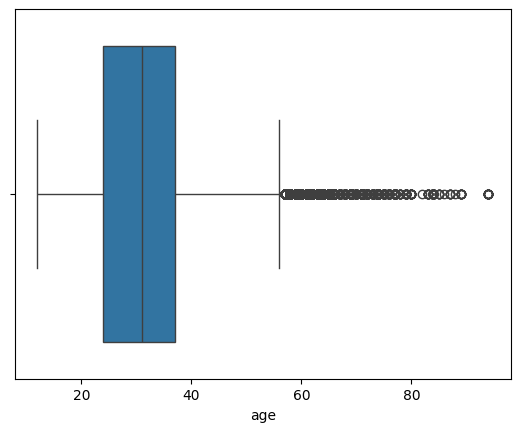

In [10]:
sns.boxplot(data=df, x='age')

Половой состав: женщин явно пользуются сервисом реже, чем мужчины

Посмотрим сколько всего уникальных юзеров, сколько в среднем человек делает поездок через сервис

<Axes: xlabel='gender_cd'>

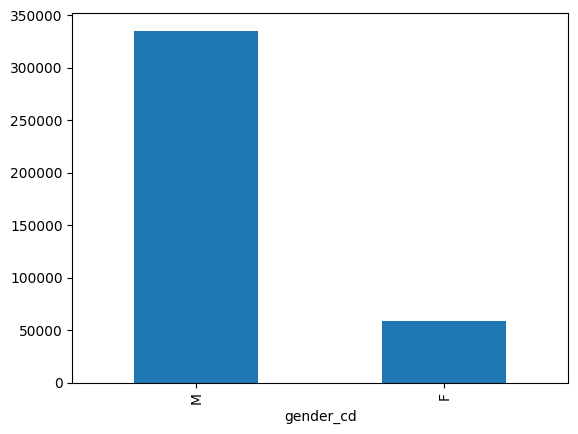

In [11]:
df['gender_cd'].value_counts().plot(kind='bar')

In [12]:
orders_per_user = df['party_rk'].value_counts()
orders_per_user.describe()

count    64052.000000
mean         6.194170
std         13.711978
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        388.000000
Name: count, dtype: float64

Видно что большая часть делает не больше 2 поездок. Есть предположение, что за первую поездку через приложение дают повышенный кэшбек, люди получают его и больше не пользуется, рассмотрим метрики активности пользователей:

DAU
         date  dau
0  2024-04-07    1
1  2024-04-09    2
2  2024-04-10    1
3  2024-04-11    1
4  2024-04-12    1
WAU
                    week  wau
0  2024-04-01/2024-04-07    1
1  2024-04-08/2024-04-14    6
2  2024-04-15/2024-04-21    5
3  2024-04-22/2024-04-28   24
4  2024-04-29/2024-05-05   29
MAU
     month    mau
0  2024-04     32
1  2024-05   2281
2  2024-06  12374
3  2024-07  18493
4  2024-08  27767

Общая статистика:
Максимальный DAU: 3448
Средний DAU: 1444
Максимальный WAU: 12377
Максимальный MAU: 29212


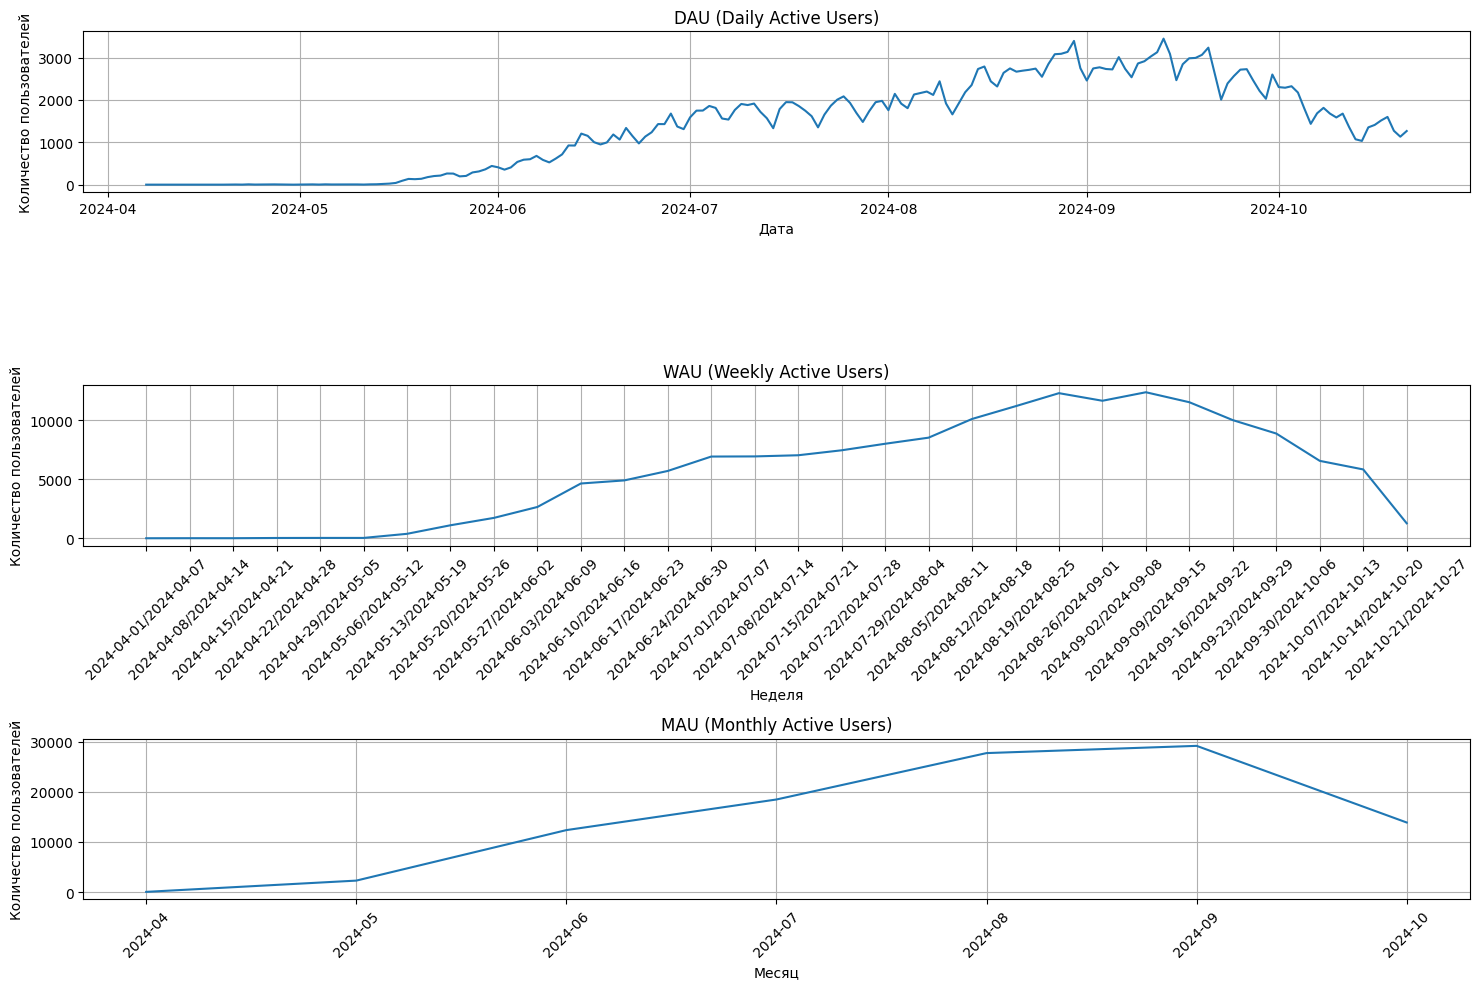

Коэффициент вовлеченности по месяцам:
     month      avg_dau    mau  stickiness
0  2024-04     3.000000     32    0.093750
1  2024-05   115.838710   2281    0.050784
2  2024-06   949.666667  12374    0.076747
3  2024-07  1760.483871  18493    0.095197
4  2024-08  2452.548387  27767    0.088326
5  2024-09  2736.700000  29212    0.093684
6  2024-10  1608.904762  13895    0.115790


In [13]:
df['date'] = df['local_book_start_dttm'].dt.date
df['week'] = df['local_book_start_dttm'].dt.to_period('W')
df['month'] = df['local_book_start_dttm'].dt.to_period('M')


dau_df = df.groupby('date')['party_rk'].nunique().reset_index()
dau_df.columns = ['date', 'dau']
print("DAU")
print(dau_df.head())

wau_df = df.groupby('week')['party_rk'].nunique().reset_index()
wau_df.columns = ['week', 'wau']
print("WAU")
print(wau_df.head())

mau_df = df.groupby('month')['party_rk'].nunique().reset_index()
mau_df.columns = ['month', 'mau']
print("MAU")
print(mau_df.head())

print(f"\nОбщая статистика:")
print(f"Максимальный DAU: {dau_df['dau'].max()}")
print(f"Средний DAU: {dau_df['dau'].mean():.0f}")
print(f"Максимальный WAU: {wau_df['wau'].max()}")
print(f"Максимальный MAU: {mau_df['mau'].max()}")

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(dau_df['date'], dau_df['dau'])
plt.title('DAU (Daily Active Users)')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(wau_df['week'].astype(str), wau_df['wau'])
plt.title('WAU (Weekly Active Users)')
plt.xlabel('Неделя')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(mau_df['month'].astype(str), mau_df['mau'])
plt.title('MAU (Monthly Active Users)')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

dau_df['month'] = pd.to_datetime(dau_df['date']).dt.to_period('M')

monthly_avg_dau = dau_df.groupby('month')['dau'].mean().reset_index()
monthly_avg_dau.columns = ['month', 'avg_dau']

stickiness_df = pd.merge(monthly_avg_dau, mau_df, on='month')
stickiness_df['stickiness'] = stickiness_df['avg_dau'] / stickiness_df['mau']

print("Коэффициент вовлеченности по месяцам:")
print(stickiness_df[['month', 'avg_dau', 'mau', 'stickiness']])

Видим вовлеченность около 10%, что достаточно много для сервиса самокатов

Посмотрим какая возрастная группа среднем приносит сервису больше

In [14]:
bins = [0, 18, 26, 36, 46, 56, 66, np.inf]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']


df['age_group'] = pd.cut(df['age'], 
                        bins=bins, 
                        labels=labels, 
                        right=False)  

print(df['age_group'].value_counts().sort_index())

age_group
<18          47
18-25    125741
26-35    144454
36-45     97175
46-55     22984
56-65      4463
65+        1885
Name: count, dtype: int64


In [15]:
age_group_sum = df.groupby('age_group')['nominal_price_rub_amt'].sum().reset_index()
age_group_sum.columns = ['age_group', 'nominal_price_rub_amt']

print("Суммарная стоимость по возрастным категориям:")
print(age_group_sum)

Суммарная стоимость по возрастным категориям:
  age_group  nominal_price_rub_amt
0       <18                6813.71
1     18-25            15168772.50
2     26-35            18392034.91
3     36-45            13106880.41
4     46-55             3084280.51
5     56-65              624653.24
6       65+              260659.74


C:\Users\nicit\AppData\Local\Temp\ipykernel_19836\1259408254.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sum = df.groupby('age_group')['nominal_price_rub_amt'].sum().reset_index()


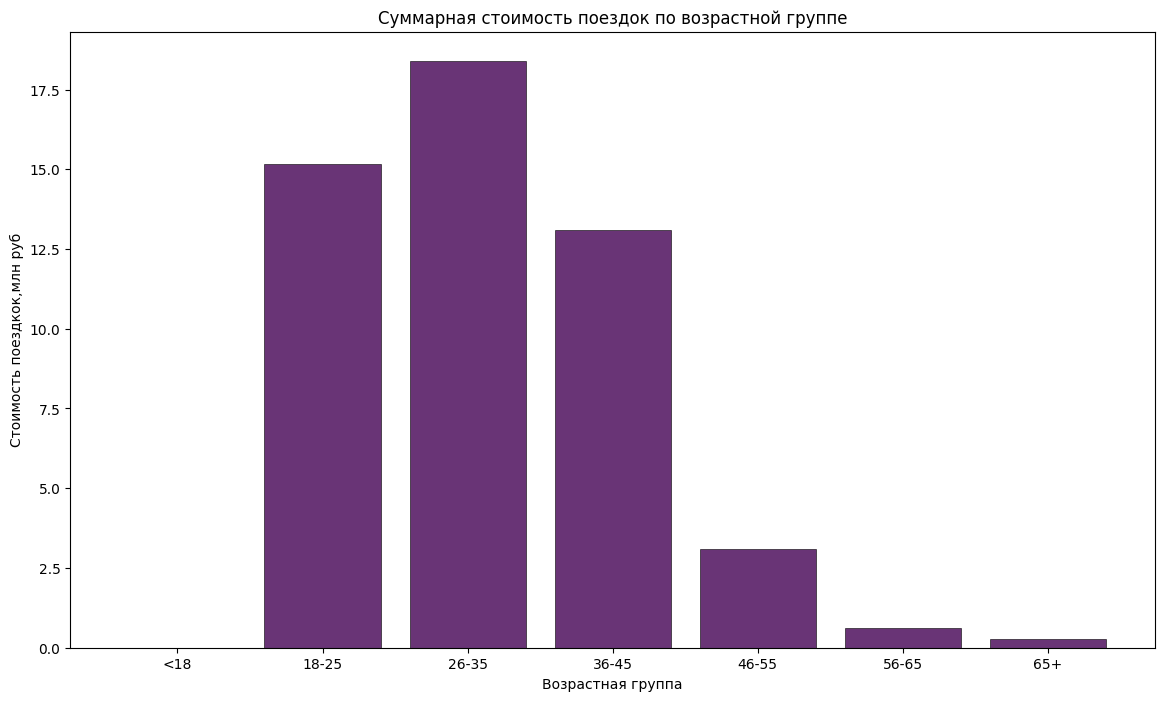

In [16]:
plt.figure(figsize=(14, 8))
plt.title('Суммарная стоимость поездок по возрастной группе')
plt.xlabel('Возрастная группа')
plt.ylabel('Стоимость поездкок,млн руб')
bars = plt.bar(age_group_sum['age_group'], age_group_sum['nominal_price_rub_amt']/1000000, 
               color=plt.cm.viridis(np.linspace(0, 1, len(df))),
               alpha=0.8,
               edgecolor='black',
               linewidth=0.5)

Видим, что больше всего заплатили люди в возрасте от 26-35, на 5 млн меньше заплатили категории 18-25 и 46-45. Взглянем пристальнее на эти группы:

C:\Users\nicit\AppData\Local\Temp\ipykernel_19836\653235766.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_plot = df.groupby(['age_group', 'marital_status_cd']).size().unstack().fillna(0)
C:\Users\nicit\AppData\Local\Temp\ipykernel_19836\653235766.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_plot = df.groupby(['age_group', 'education_level_cd']).size().unstack().fillna(0)
C:\Users\nicit\AppData\Local\Temp\ipykernel_19836\653235766.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

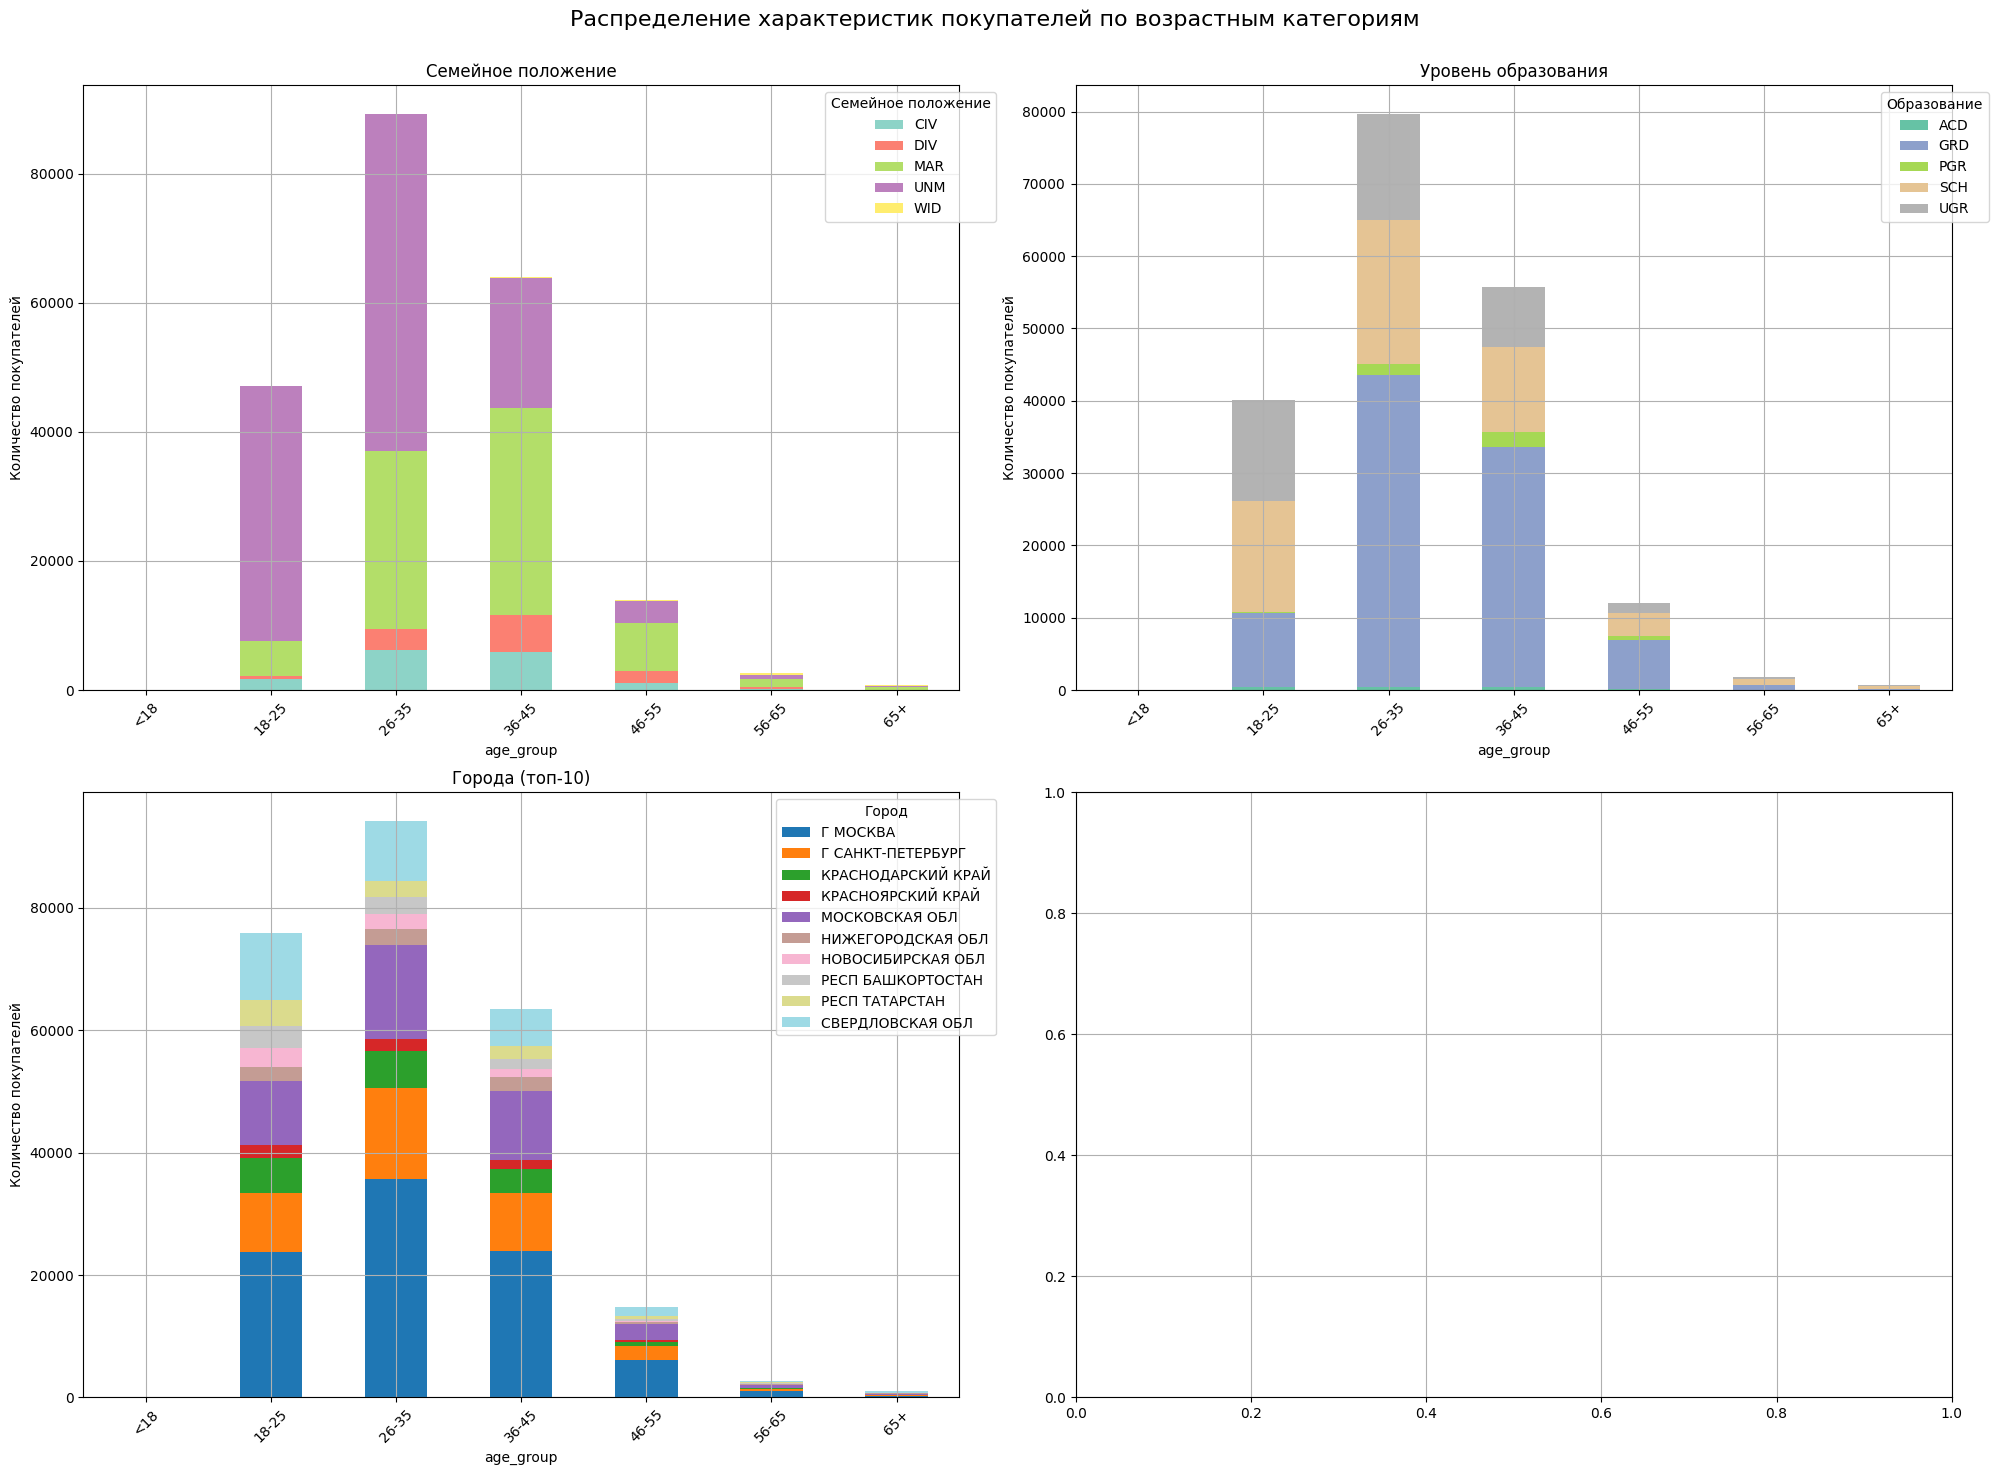

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Распределение характеристик покупателей по возрастным категориям', fontsize=16)


family_plot = df.groupby(['age_group', 'marital_status_cd']).size().unstack().fillna(0)
family_plot.plot(kind='bar', ax=axes[0,0], stacked=True, colormap='Set3')
axes[0,0].set_title('Семейное положение')
axes[0,0].set_ylabel('Количество покупателей')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True)
axes[0,0].legend(title='Семейное положение', bbox_to_anchor=(1.05, 1))


education_plot = df.groupby(['age_group', 'education_level_cd']).size().unstack().fillna(0)
education_plot.plot(kind='bar', ax=axes[0,1], stacked=True, colormap='Set2')
axes[0,1].set_title('Уровень образования')
axes[0,1].set_ylabel('Количество покупателей')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True)
axes[0,1].legend(title='Образование', bbox_to_anchor=(1.05, 1))


top_cities = df['lvn_state_nm'].value_counts().head(10).index
city_data = df[df['lvn_state_nm'].isin(top_cities)]
city_plot = city_data.groupby(['age_group', 'lvn_state_nm']).size().unstack().fillna(0)
city_plot.plot(kind='bar', ax=axes[1,0], stacked=True, colormap='tab20')
axes[1,0].set_title('Города (топ-10)')
axes[1,0].set_ylabel('Количество покупателей')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True)
axes[1,0].legend(title='Город', bbox_to_anchor=(1.05, 1))


plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.grid(True)
plt.show()

# Анализ по времени

Теперь посмотрим в каком месяце сервис заработал больше всего

In [18]:
df['month_name'] = df['local_book_start_dttm'].dt.month_name()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'September'),
  Text(1, 0, 'August'),
  Text(2, 0, 'July'),
  Text(3, 0, 'October'),
  Text(4, 0, 'June'),
  Text(5, 0, 'May'),
  Text(6, 0, 'April')])

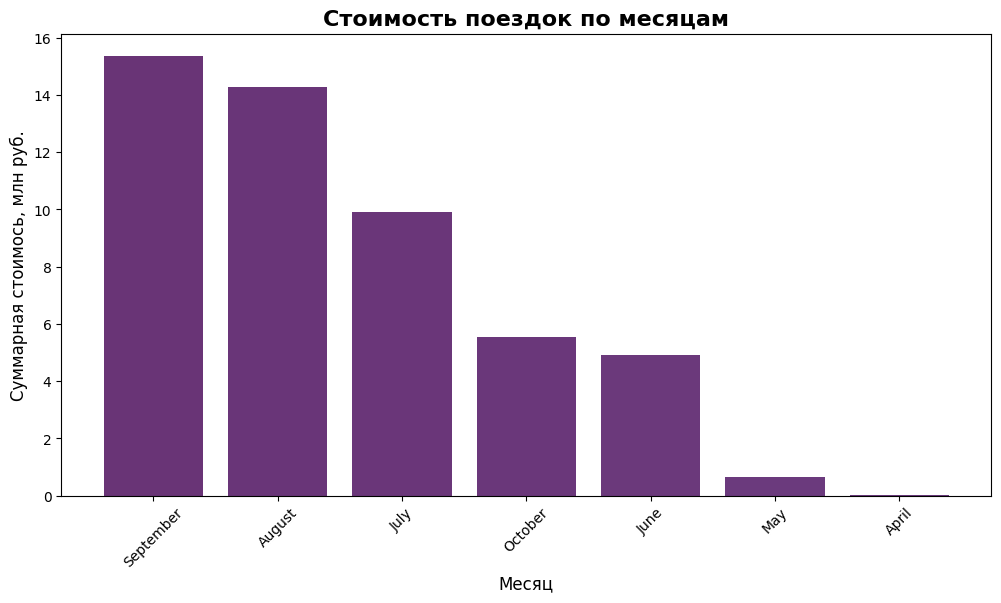

In [19]:
monthly_data = df.groupby('month_name', observed=False)['nominal_price_rub_amt'].sum().reset_index()
monthly_data_sorted = monthly_data.sort_values('nominal_price_rub_amt', ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_data_sorted['month_name'], monthly_data_sorted['nominal_price_rub_amt']/1000000, 
               color=plt.cm.viridis(range(len(monthly_data))),
               alpha=0.8)

plt.title('Стоимость поездок по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Суммарная стоимось, млн руб.', fontsize=12)
plt.xticks(rotation=45)

Видим наибольший спрос в сентябре и августе: это может быть из-за того,что сервис новый и люди узнавали о нем постепенно, что согласуется с графиком, а в октябре было уже холодно и сыро и поездки не пользовались такой популярностью

Рассмотрим еще в какое время дня чаще всего совершаются поездки:

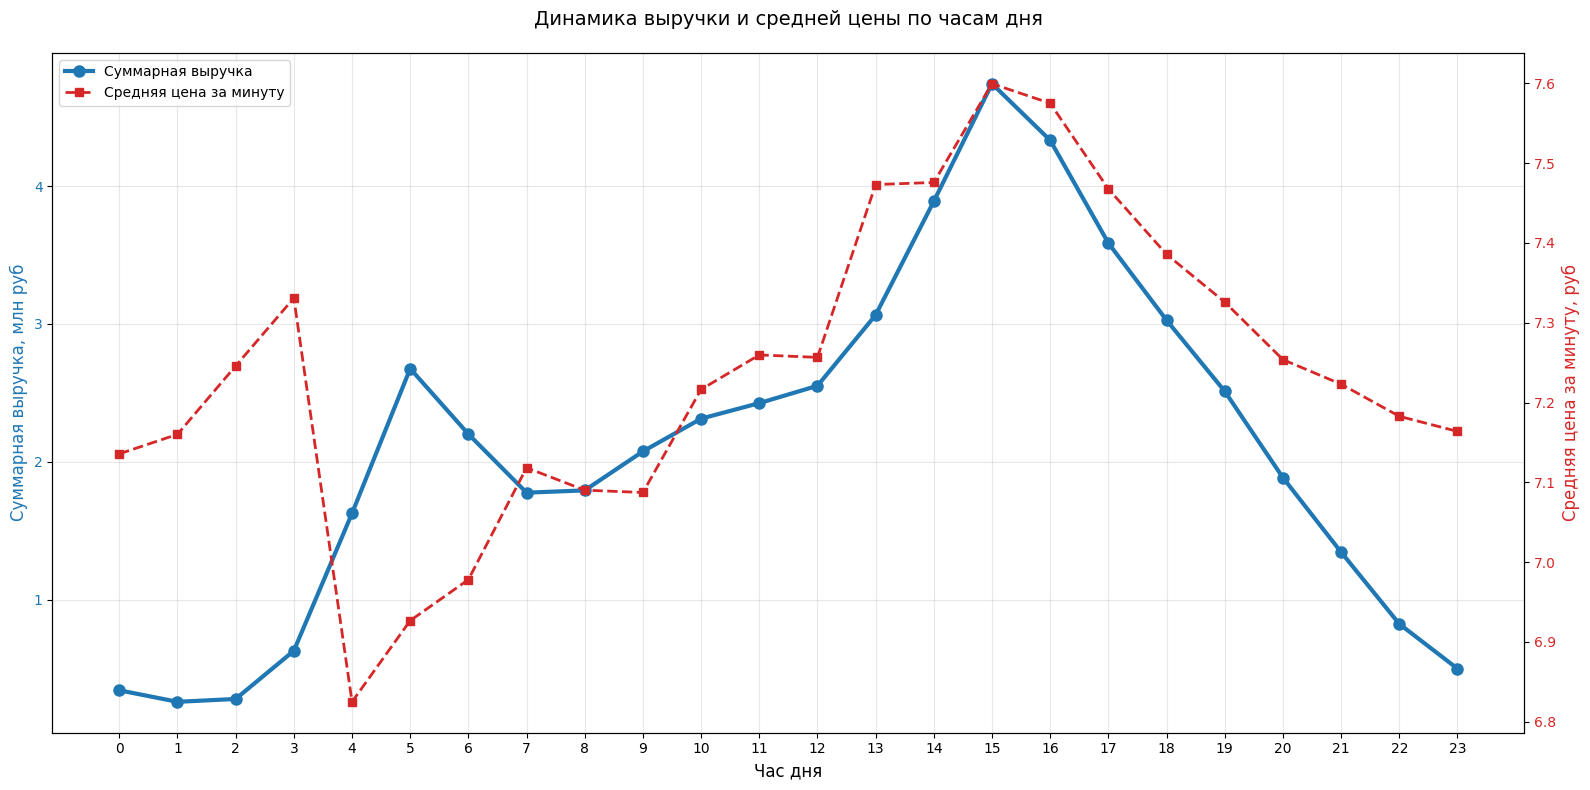

In [20]:
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])
df['hour'] = df['local_book_start_dttm'].dt.hour

hourly_revenue = df.groupby('hour')['nominal_price_rub_amt'].sum().reset_index()
hourly_revenue.columns = ['hour', 'total_revenue']


hour_price = df.groupby('hour')['minute_cost'].mean().reset_index()
hour_price.columns = ['hour', 'avg_price']

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.set_xlabel('Час дня', fontsize=12)
ax1.set_ylabel('Суммарная выручка, млн руб', fontsize=12, color=color)
line1 = ax1.plot(hourly_revenue['hour'], hourly_revenue['total_revenue']/1000000, 
                color=color, marker='o', linewidth=3, markersize=8, 
                label='Суммарная выручка')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Средняя цена за минуту, руб', fontsize=12, color=color)
line2 = ax2.plot(hour_price['hour'], hour_price['avg_price'], 
                color=color, marker='s', linewidth=2, markersize=6, 
                linestyle='--', label='Средняя цена за минуту')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Динамика выручки и средней цены по часам дня', fontsize=14, pad=20)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

Видно пик в 15 часов и в целом большую прибыльность в окрестности значения. Это может быть либо из-за высокой цены поездки либо из-за более частого использования в эти часы. Как видно на графике, цена в 15 часов действительно чуть выше. Можно также заметить, что с 12 до 3 ночи цена держится довольно высоко и опускаются к 4 утра, когда количество поездок и начинает расти. В голову приходит ПЕРВАЯ ГИПОТЕЗА: снизить цену в ночное время, чтобы увеличить прибыль.

Внимательнее рассмотрим разбивку по городам:


In [21]:
cities=(df.groupby(['lvn_state_nm'])['nominal_price_rub_amt'].sum())/1000
cities.describe()

count      212.000000
mean       217.912722
std        982.087097
min          0.000000
25%          0.548415
50%          6.360635
75%        110.815070
max      11877.536280
Name: nominal_price_rub_amt, dtype: float64

Видно что города ниже 25 квантиля заработали меньше 500 рублей, это можно считать выбросом на фоне общей прибыли это выброс, отсечем все что ниже 25%

In [22]:
cities_new = cities[cities >= cities.quantile(0.25)].sort_values(ascending=False)
cities_new[:10]

lvn_state_nm
Г МОСКВА              11877.53628
МОСКОВСКАЯ ОБЛ         5262.99823
Г САНКТ-ПЕТЕРБУРГ      4712.75603
СВЕРДЛОВСКАЯ ОБЛ       2927.28074
КРАСНОДАРСКИЙ КРАЙ     2100.26191
РЕСП ТАТАРСТАН         1115.10374
РЕСП БАШКОРТОСТАН      1015.37964
НИЖЕГОРОДСКАЯ ОБЛ       972.72382
РОСТОВСКАЯ ОБЛ          717.09026
РЕСП УДМУРТСКАЯ         711.71604
Name: nominal_price_rub_amt, dtype: float64

Ожидаемо лидируют Москва и Московская область, Санкт-Петербург

# Кэшбэк

Посмотрим на влияние кэшбэка на общую стоимость поездки и их частоту

In [23]:
df['loyalty_accrual_rub_amt'].mean()

np.float64(37.51612107729869)

В среднем выплачивают около 37 рублей кэшбэка

In [24]:
df['loyalty_accrual_rub_amt'].describe()

count    366992.000000
mean         37.516121
std          75.208560
min        -161.940000
25%          11.240000
50%          18.730000
75%          35.060000
max        3185.000000
Name: loyalty_accrual_rub_amt, dtype: float64

Видим явные выбросы в минимальной и максимальной cумме кэшбека, отфильруем их:

In [25]:
p1 = df['loyalty_accrual_rub_amt'].quantile(0.01)
p99 = df['loyalty_accrual_rub_amt'].quantile(0.99)

df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].where(
    (df['loyalty_accrual_rub_amt'] >= p1) & (df['loyalty_accrual_rub_amt'] <= p99), 
    0
)

u1 = df['nominal_price_rub_amt'].quantile(0.05)
u99 = df['nominal_price_rub_amt'].quantile(0.99)

df['nominal_price_rub_amt'] = df['nominal_price_rub_amt'].where(
    (df['nominal_price_rub_amt'] >= u1) & (df['nominal_price_rub_amt'] <= u99), 
    0
)



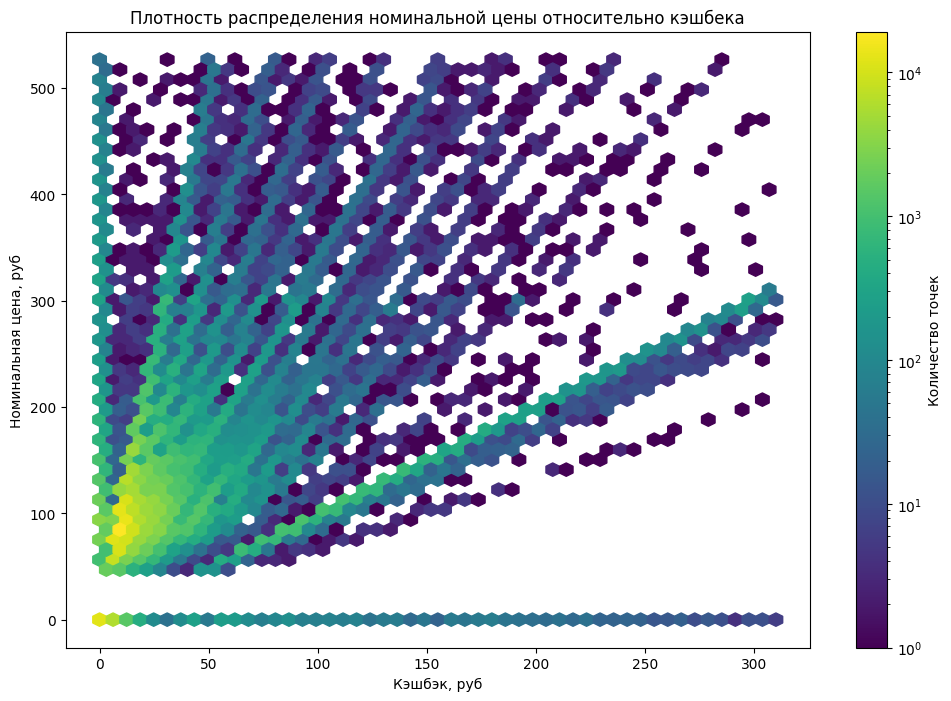

In [26]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['loyalty_accrual_rub_amt'],
           df['nominal_price_rub_amt'],  
           gridsize=50,  
           cmap='viridis', 
           bins='log')   
plt.colorbar(label='Количество точек')
plt.title('Плотность распределения номинальной цены относительно кэшбека')
plt.ylabel('Номинальная цена, руб')
plt.xlabel('Кэшбэк, руб')
plt.show()

Видим яркие прямые из левого нижнего угла. Предположу что их несколько из-за разных процентов кэшбека у разных пользователей, но виден общий тренд, что чем больше цена поездки, тем больше кэшбек, но это и так понятно

# Анализ цен

Начнем с влияния цены старта на общую стоимость поездки:

## Цена старта

In [27]:
df['activation_cost'].describe()

count    396749.000000
mean         42.593226
std          11.989974
min           0.000000
25%          30.000000
50%          50.000000
75%          50.000000
max          50.000000
Name: activation_cost, dtype: float64

In [28]:
data=df.groupby('activation_cost')['nominal_price_rub_amt'].count()
data

activation_cost
0.0      15060
5.0         12
10.0         5
15.0       108
20.0       708
30.0     89069
35.0     13015
40.0     17559
45.0      1535
50.0    259678
Name: nominal_price_rub_amt, dtype: int64

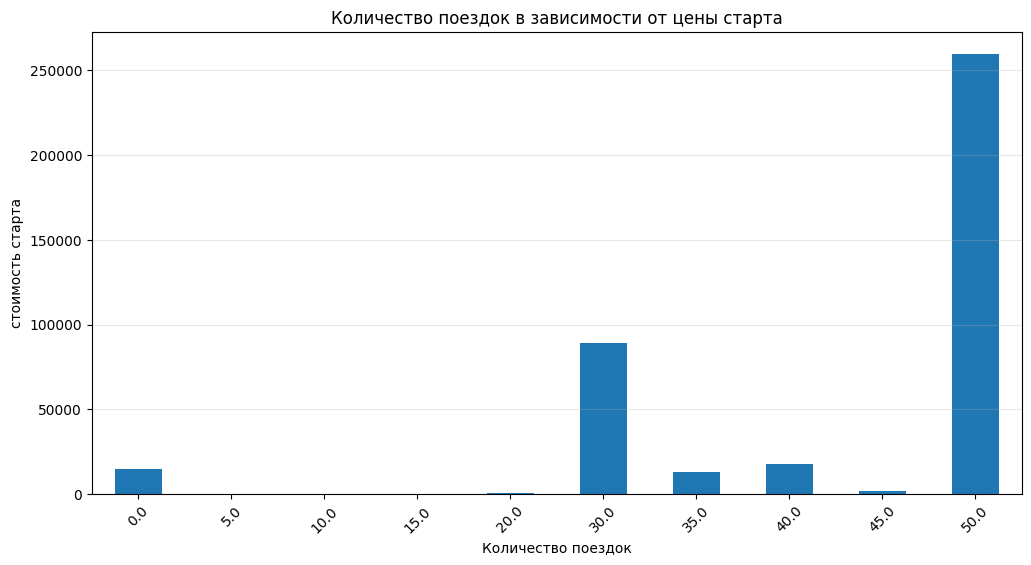

In [29]:
data.plot(kind='bar', figsize=(12, 6))
plt.title('Количество поездок в зависимости от цены старта')
plt.xlabel('Количество поездок')
plt.ylabel('стоимость старта')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

Видим, что людям не так важна стоимость начала, ведь за максимальную стоимость старта было совершено максимальное количество поездок. Возникает ВТОРАЯ ГИПОТЕЗА: для увеличения прибыли можно увеличить цену старта

## Цена минуты

In [30]:
df['minute_cost'].describe()

count    396749.000000
mean          7.288688
std           1.289492
min           1.500000
25%           6.490000
50%           7.490000
75%           8.220000
max          19.990000
Name: minute_cost, dtype: float64

In [31]:
bins = [0, 4, 6, 8, 10, 12, 20]
labels = ['<4', '4-6', '6-8', '8-10', '10-12', '12-20']

df['minute_group'] = pd.cut(df['minute_cost'], 
                        bins=bins, 
                        labels=labels, 
                        right=False)  

print(df['minute_group'].value_counts().sort_index())

minute_group
<4           44
4-6       90451
6-8      198973
8-10     104130
10-12      3131
12-20        20
Name: count, dtype: int64


In [32]:
minutes=(df.groupby('minute_group')['nominal_price_rub_amt'].sum())/1000
minutes

C:\Users\nicit\AppData\Local\Temp\ipykernel_19836\3150472684.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  minutes=(df.groupby('minute_group')['nominal_price_rub_amt'].sum())/1000


minute_group
<4           0.93200
4-6       8784.19190
6-8      24055.98730
8-10     13887.99929
10-12      449.14591
12-20        2.10937
Name: nominal_price_rub_amt, dtype: float64

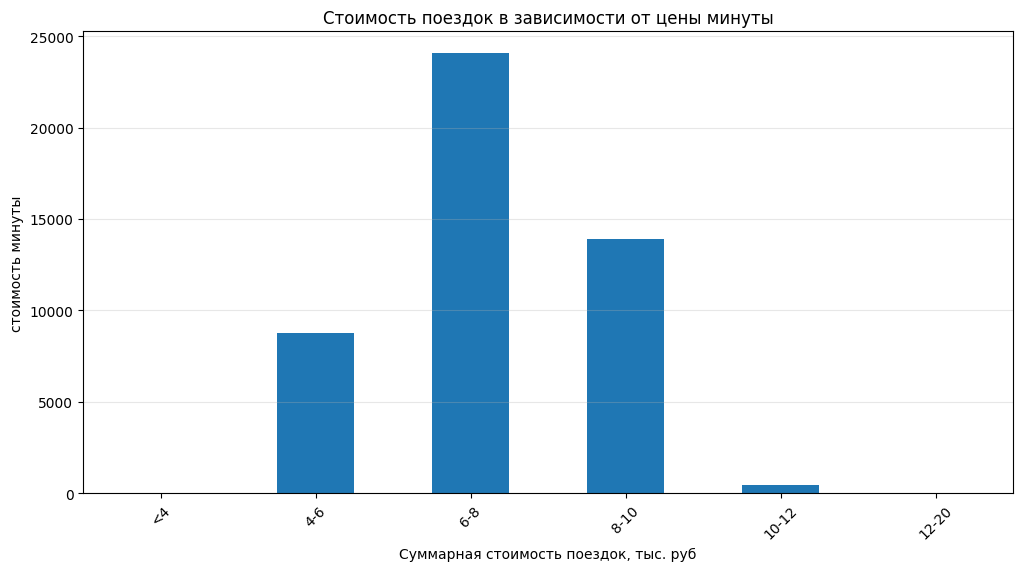

In [33]:
minutes.plot(kind='bar', figsize=(12, 6))
plt.title('Cтоимость поездок в зависимости от цены минуты')
plt.xlabel('Суммарная стоимость поездок, тыс. руб')
plt.ylabel('стоимость минуты')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [34]:
print('Cамая частая цена в приложении:')
print((df['minute_group'].describe()['top']))

Cамая частая цена в приложении:
6-8


А вот с ценой минуты обстоит иначе, люди больше платят при цене минуты от 6 до 8 рублей. Также эта стоимость встречается чаще всего, так что это закономерно.

## Цена залога

In [35]:
df['hold_amount'].describe()

count    396749.000000
mean        299.983869
std           1.939153
min          80.000000
25%         300.000000
50%         300.000000
75%         300.000000
max         500.000000
Name: hold_amount, dtype: float64

In [36]:
hold=(df.groupby('hold_amount')['nominal_price_rub_amt'].sum())
hold

hold_amount
80.0         1096.00
300.0    47179207.32
500.0          62.45
Name: nominal_price_rub_amt, dtype: float64

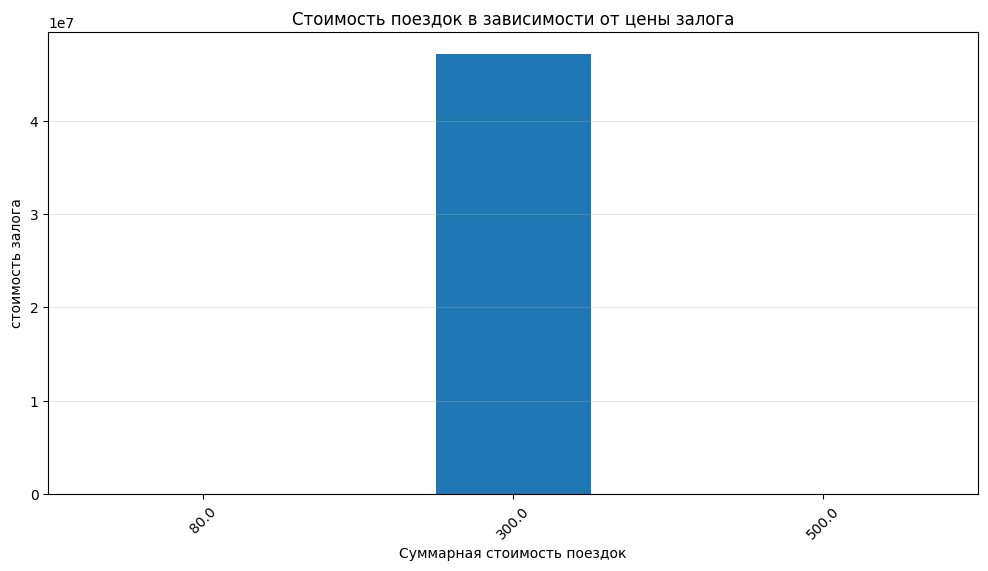

In [37]:
hold.plot(kind='bar', figsize=(12, 6))
plt.title('Cтоимость поездок в зависимости от цены залога')
plt.xlabel('Суммарная стоимость поездок')
plt.ylabel('стоимость залога')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

Это и не удивительно, учитывая что такой залог взимался в подавляющем большинстве случаев, к тому же залог почти всегда возвращается на карту, так что это не решающий фактор.

# Гипотезы и проверка

Сначала определим верна ли гипотеза - посмотрим насколько зависит спрос в ночное время от цены минуты: разделим датасет не две группы: тех у кого в ночное время(21:00-3:00) цена минуты ниже медианы и выше.

## ПЕРВАЯ ГИПОТЕЗА: снизить цену в ночное время, чтобы увеличить прибыль.

In [38]:
mid=df[((df['hour'] >= 22) | (df['hour'] <= 3))]['minute_cost'].median()

In [39]:
low_price=df[(df['minute_cost'] < mid) & 
                 ((df['hour'] >= 22) | (df['hour'] <= 3))]
high_price=df[(df['minute_cost'] >= mid) & 
                 ((df['hour'] >= 22) | (df['hour'] <= 3))]
print(low_price['nominal_price_rub_amt'].count())
print(high_price['nominal_price_rub_amt'].count())

9711
12090


Оказывается, что спрос на самокаты в ночное время не зависит от цены(так как больше людей арендуют самокат за цену большую медианы), так что при её понижении прибыль только уменьшится. Тогда рассмотрим вариант повышения цены в ночное время. Скажем, увеличим цену в ночное время на 10%

In [40]:
df['new_price'] = np.where(
    (df['hour'] >= 22) | (df['hour'] <= 3),  
    df['minute_cost'] * 1.1,                 
    df['minute_cost']                        
)

Теперь посмотрим насколько бы увеличилась прибыль:

In [41]:
df['new_sum']=df['new_price']*((df['book_end_dttm']-df['book_start_dttm']).astype('int64') // 60 // 10**9)+df['activation_cost']


In [42]:
T_sum=float(df['nominal_price_rub_amt'].sum())
minute_profit=((df['new_sum'].sum()-T_sum)/(T_sum))*100
print('Прибыль увеличится на',float(minute_profit),'%')

Прибыль увеличится на 2.686945216109592 %


## ВТОРАЯ ГИПОТЕЗА: для увеличения прибыли можно увеличить цену старта

Рассмотрим насколько удастся увеличить прибыль. Пусть цена старта повысится на 10 рублей. Посмотрим как изменятся доходы:

In [50]:
T_sum=float(df['nominal_price_rub_amt'].sum())
start_profit=((10*data.sum())/T_sum)*100
print('Прибыль увеличится на',float(start_profit),'%')

Прибыль увеличится на 8.409197205763842 %


### Сравнение

Рассмотрим, насколько больше внедрение второй гипотезы потенциально могло бы увеличить прибыль чем внедрение первой:

In [51]:
delta=((start_profit-minute_profit)/100)*T_sum
float(delta)

2699779.4189999774

В итоге разница составляет около 2,7 млн. руб. Очевидно прибыль от внедрения второй гипотезы больше, хоть больше и риски, ведь по информации из открытых источников, в whoosh cредняя цена старта 30-50 рублей, YandexGo - 50 рублей. С одной стороны, повышение цены старта повысит прибыль, но и сделает цену выше чем у конкурентов. С другой стороны, несмотря на это пользователи могут выбирать сервис Т-банка из-за повышенного кэшбека или удобства - не нужно скачивать отдельное приложение для аренды.

# Доля сервиса Т-Банка

По данным сайта truesharing.ru в России за сезон 2024 года рынок самокатов заработал 31,1 млрд рублей. Сервис Т-банка за этот же сезон заработал:

In [45]:
T_sum=float(df['nominal_price_rub_amt'].sum())
T_sum

47180365.769999996

In [46]:
T_part=(T_sum/31000000000)*100
print('Доля сервиса Т-банка составила:', T_part,'%')

Доля сервиса Т-банка составила: 0.15219472829032257 %
